In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv')
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [3]:
data = data.drop('_c39',axis = 1)

In [4]:
data.isna().sum().sum()

0

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

## Visualization for categorical columns

In [6]:
data_cat = data[['policy_bind_date','policy_state','policy_csl','insured_sex','insured_education_level','insured_occupation',
                 'insured_hobbies','insured_relationship','incident_date','incident_type','collision_type','incident_severity',
                 'authorities_contacted','incident_state','incident_city','incident_location','property_damage',
                 'police_report_available','auto_make','auto_model','fraud_reported','policy_deductable','umbrella_limit',
                 'number_of_vehicles_involved','bodily_injuries','witnesses']]
data_cat.shape

(1000, 26)

The value counts for policy_bind_date is

01-01-2006    3
28-04-1992    3
05-08-1992    3
14-12-1991    2
09-08-2004    2
             ..
03-06-2014    1
12-12-1998    1
18-02-1999    1
30-10-1997    1
11-11-1996    1
Name: policy_bind_date, Length: 951, dtype: int64 



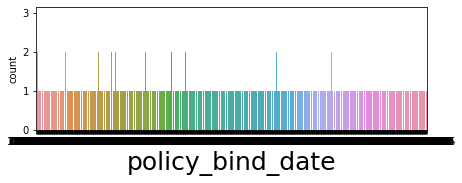

The value counts for policy_state is

OH    352
IL    338
IN    310
Name: policy_state, dtype: int64 



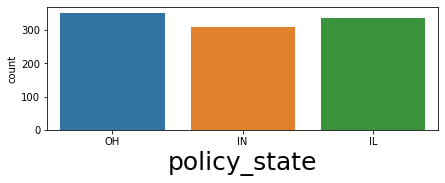

The value counts for policy_csl is

250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64 



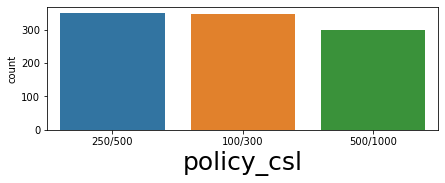

The value counts for insured_sex is

FEMALE    537
MALE      463
Name: insured_sex, dtype: int64 



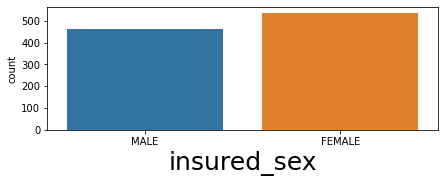

The value counts for insured_education_level is

JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64 



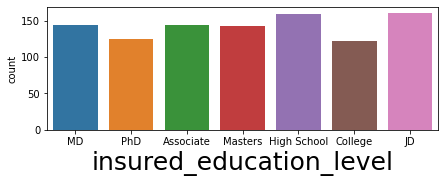

The value counts for insured_occupation is

machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64 



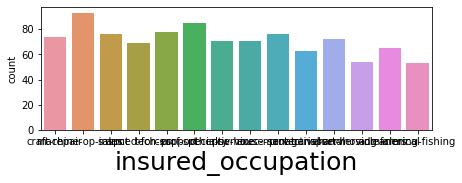

The value counts for insured_hobbies is

reading           64
exercise          57
paintball         57
bungie-jumping    56
movies            55
golf              55
camping           55
kayaking          54
yachting          53
hiking            52
video-games       50
skydiving         49
base-jumping      49
board-games       48
polo              47
chess             46
dancing           43
sleeping          41
cross-fit         35
basketball        34
Name: insured_hobbies, dtype: int64 



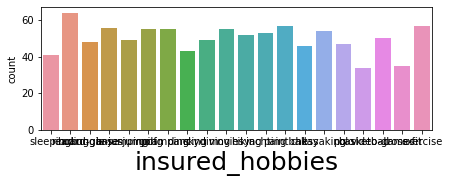

The value counts for insured_relationship is

own-child         183
other-relative    177
not-in-family     174
husband           170
wife              155
unmarried         141
Name: insured_relationship, dtype: int64 



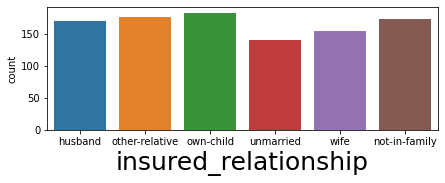

The value counts for incident_date is

02-02-2015    28
17-02-2015    26
07-01-2015    25
10-01-2015    24
04-02-2015    24
24-01-2015    24
19-01-2015    23
08-01-2015    22
13-01-2015    21
30-01-2015    21
12-02-2015    20
22-02-2015    20
31-01-2015    20
06-02-2015    20
21-02-2015    19
01-01-2015    19
23-02-2015    19
12-01-2015    19
14-01-2015    19
21-01-2015    19
03-01-2015    18
14-02-2015    18
01-02-2015    18
28-02-2015    18
20-01-2015    18
18-01-2015    18
25-02-2015    18
06-01-2015    17
09-01-2015    17
08-02-2015    17
24-02-2015    17
26-02-2015    17
13-02-2015    16
15-02-2015    16
16-02-2015    16
05-02-2015    16
16-01-2015    16
17-01-2015    15
18-02-2015    15
28-01-2015    15
15-01-2015    15
22-01-2015    14
20-02-2015    14
27-02-2015    14
23-01-2015    13
03-02-2015    13
27-01-2015    13
09-02-2015    13
04-01-2015    12
01-03-2015    12
26-01-2015    11
29-01-2015    11
02-01-2015    11
19-02-2015    10
11-02-2015    10
10-02-2015    10
07-02-201

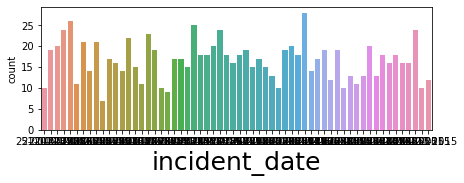

The value counts for incident_type is

Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64 



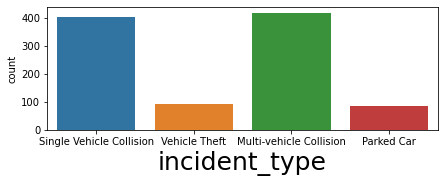

The value counts for collision_type is

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64 



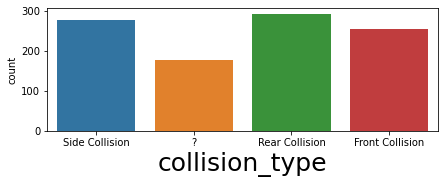

The value counts for incident_severity is

Minor Damage      354
Total Loss        280
Major Damage      276
Trivial Damage     90
Name: incident_severity, dtype: int64 



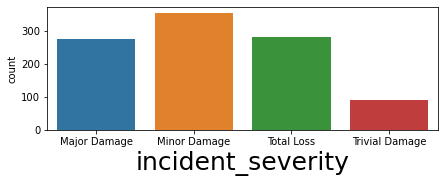

The value counts for authorities_contacted is

Police       292
Fire         223
Other        198
Ambulance    196
None          91
Name: authorities_contacted, dtype: int64 



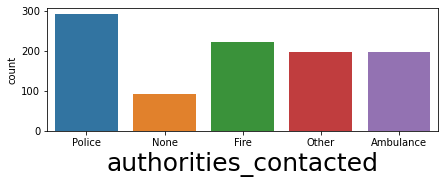

The value counts for incident_state is

NY    262
SC    248
WV    217
VA    110
NC    110
PA     30
OH     23
Name: incident_state, dtype: int64 



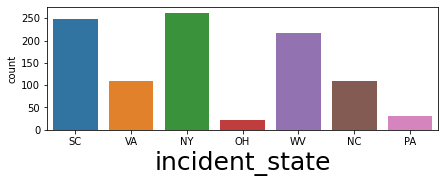

The value counts for incident_city is

Springfield    157
Arlington      152
Columbus       149
Northbend      145
Hillsdale      141
Riverwood      134
Northbrook     122
Name: incident_city, dtype: int64 



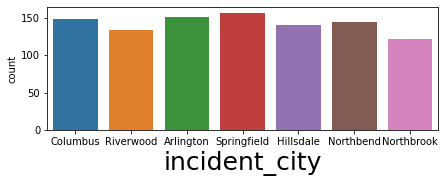

The value counts for incident_location is

9935 4th Drive         1
4214 MLK Ridge         1
8548 Cherokee Ridge    1
2352 MLK Drive         1
9734 2nd Ridge         1
                      ..
6770 1st St            1
4119 Texas St          1
4347 2nd Ridge         1
1091 1st Drive         1
1416 Cherokee Ridge    1
Name: incident_location, Length: 1000, dtype: int64 



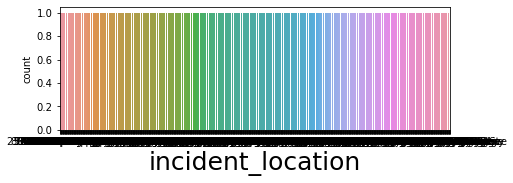

The value counts for property_damage is

?      360
NO     338
YES    302
Name: property_damage, dtype: int64 



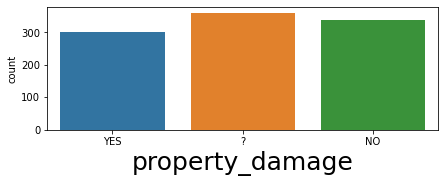

The value counts for police_report_available is

?      343
NO     343
YES    314
Name: police_report_available, dtype: int64 



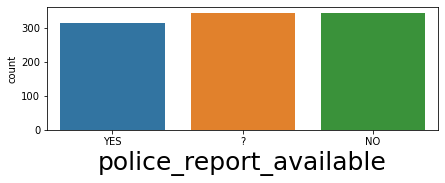

The value counts for auto_make is

Saab          80
Dodge         80
Suburu        80
Nissan        78
Chevrolet     76
Ford          72
BMW           72
Toyota        70
Audi          69
Accura        68
Volkswagen    68
Jeep          67
Mercedes      65
Honda         55
Name: auto_make, dtype: int64 



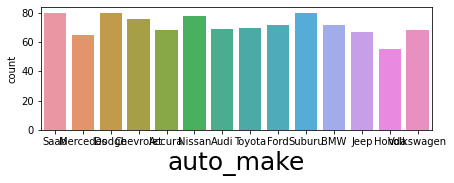

The value counts for auto_model is

RAM               43
Wrangler          42
A3                37
Neon              37
MDX               36
Jetta             35
Passat            33
A5                32
Legacy            32
Pathfinder        31
Malibu            30
92x               28
Camry             28
Forrestor         28
F150              27
95                27
E400              27
93                25
Grand Cherokee    25
Escape            24
Tahoe             24
Maxima            24
Ultima            23
X5                23
Highlander        22
Civic             22
Silverado         22
Fusion            21
ML350             20
Impreza           20
Corolla           20
TL                20
CRV               20
C300              18
3 Series          18
X6                16
M5                15
Accord            13
RSX               12
Name: auto_model, dtype: int64 



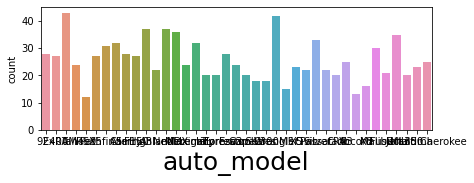

The value counts for fraud_reported is

N    753
Y    247
Name: fraud_reported, dtype: int64 



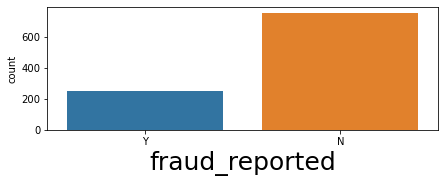

The value counts for policy_deductable is

1000    351
500     342
2000    307
Name: policy_deductable, dtype: int64 



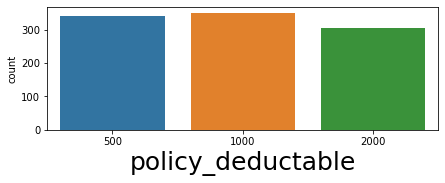

The value counts for umbrella_limit is

 0           798
 6000000      57
 5000000      46
 4000000      39
 7000000      29
 3000000      12
 8000000       8
 9000000       5
 2000000       3
 10000000      2
-1000000       1
Name: umbrella_limit, dtype: int64 



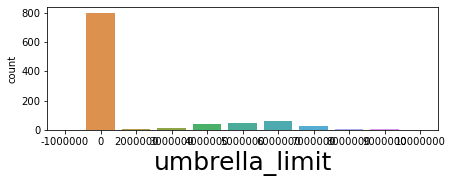

The value counts for number_of_vehicles_involved is

1    581
3    358
4     31
2     30
Name: number_of_vehicles_involved, dtype: int64 



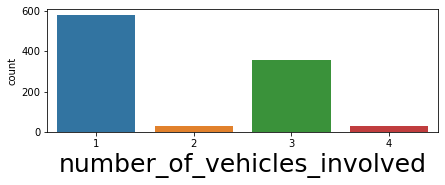

The value counts for bodily_injuries is

0    340
2    332
1    328
Name: bodily_injuries, dtype: int64 



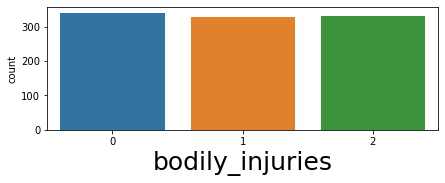

The value counts for witnesses is

1    258
2    250
0    249
3    243
Name: witnesses, dtype: int64 



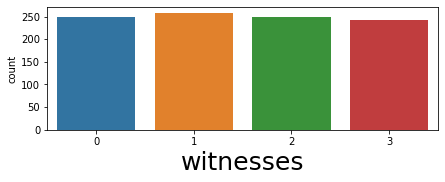

In [7]:
plotnumber = 1

for column in data_cat :
    plt.figure(figsize = (7,70))
    if plotnumber <=26:
        ax = plt.subplot(26,1,plotnumber)
        sns.countplot(data_cat[column])
        plt.xlabel(column,fontsize = 25)
        print(f"The value counts for {column} is\n")
        print(data_cat[column].value_counts(),'\n')
        plt.show()
    plotnumber +=1

In [8]:
x = data.drop('fraud_reported',axis = 1)
y = data.fraud_reported

In [9]:
x.shape

(1000, 38)

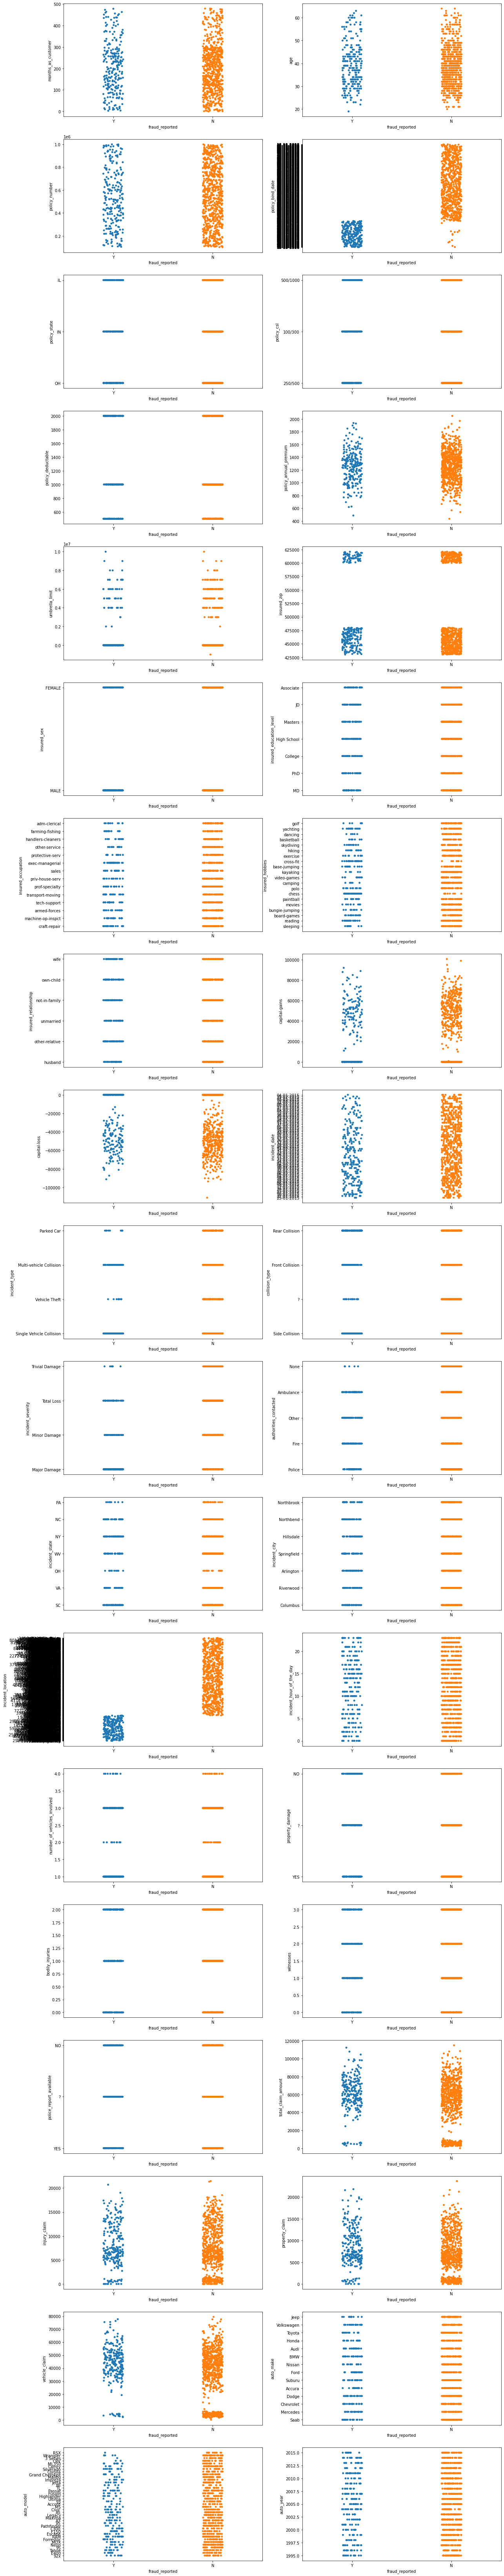

In [13]:
#Let's see how features are related to class

plt.figure(figsize = (20,120))
plotnumber = 1

for column in x :
    if plotnumber <=38 :
        ax = plt.subplot(19,2,plotnumber)
        sns.stripplot(y,x[column])
    plotnumber +=1
plt.show()

## Visualization for continuous data

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [15]:
data_cont = ['months_as_customer','age','policy_number','policy_annual_premium',
                  'insured_zip','capital-gains','capital-loss','incident_hour_of_the_day',
                  'total_claim_amount','injury_claim','property_claim','vehicle_claim','auto_year']

In [16]:
len(data_cont)

13

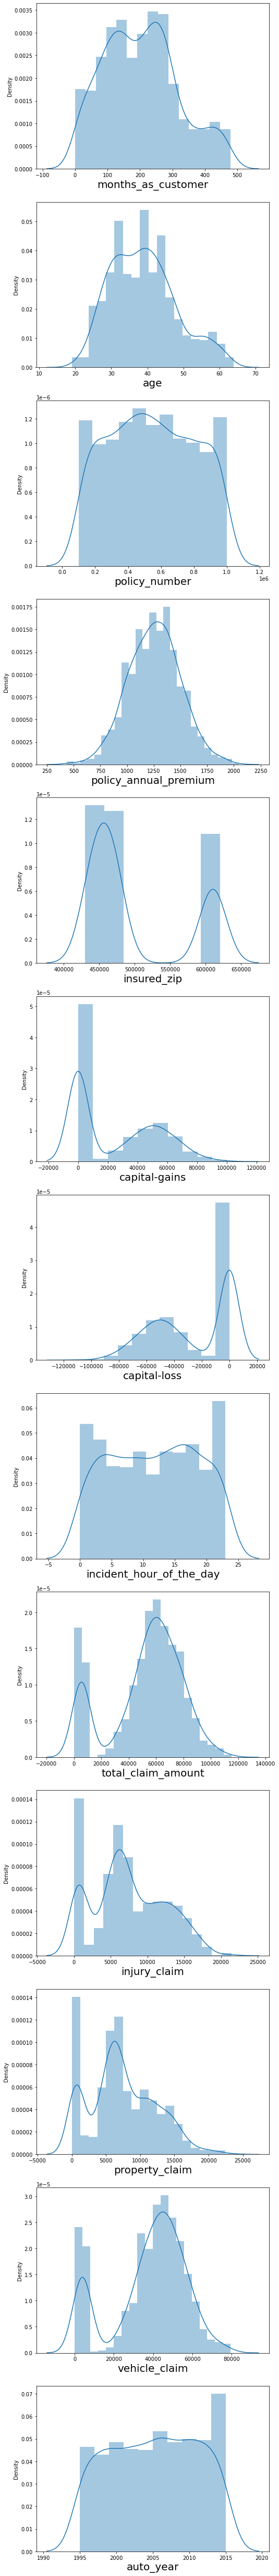

In [17]:
plt.figure(figsize = (8,90))
plotnumber = 1

for i in data[data_cont] :
    if plotnumber <=13 :
        ax = plt.subplot(13,1,plotnumber)
        sns.distplot(data[data_cont][i])
        plt.xlabel(i,fontsize = 20)
    plotnumber +=1
plt.show()

In [18]:
data[data_cont].skew()

months_as_customer          0.362177
age                         0.478988
policy_number               0.038991
policy_annual_premium       0.004402
insured_zip                 0.816554
capital-gains               0.478850
capital-loss               -0.391472
incident_hour_of_the_day   -0.035584
total_claim_amount         -0.594582
injury_claim                0.264811
property_claim              0.378169
vehicle_claim              -0.621098
auto_year                  -0.048289
dtype: float64

In [19]:
from sklearn.preprocessing import PowerTransformer

scaler = PowerTransformer(method = 'yeo-johnson')

data[data_cont] = scaler.fit_transform(data[data_cont].values)
data[data_cont].skew()

months_as_customer         -0.135661
age                        -0.001945
policy_number              -0.160374
policy_annual_premium       0.004758
insured_zip                 0.000000
capital-gains               0.038722
capital-loss                0.090488
incident_hour_of_the_day   -0.256957
total_claim_amount         -0.510354
injury_claim               -0.415781
property_claim             -0.358814
vehicle_claim              -0.522718
auto_year                  -0.012491
dtype: float64

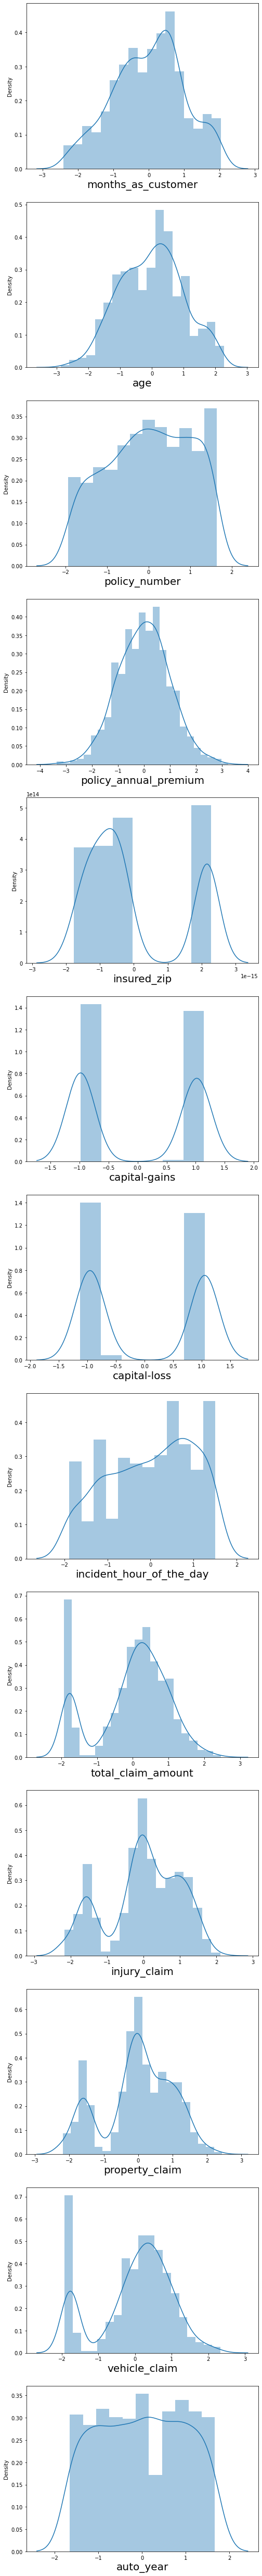

In [20]:
plt.figure(figsize = (8,90))
plotnumber = 1

for i in data[data_cont] :
    if plotnumber <=13 :
        ax = plt.subplot(13,1,plotnumber)
        sns.distplot(data[data_cont][i])
        plt.xlabel(i,fontsize = 20)
    plotnumber +=1
plt.show()

### We have removed skewness and data looked clean and continuous data looks normally distributed 
## Encoding categorical data

In [21]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()

for i in data.columns:
    if data[i].dtypes == "object":
        data[i] = enc.fit_transform(data[i].values.reshape(-1,1))
        
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,1.051279,1.008733,-0.023156,532.0,2.0,1.0,1000,0.616676,0,-5.551115e-16,...,2,2.0,0.715714,0.005762,1.081793,0.753697,10.0,1.0,-0.197455,1.0
1,0.304536,0.431433,-0.745292,821.0,1.0,1.0,2000,-0.242577,5000000,-4.996004e-16,...,0,0.0,-1.776979,-1.525347,-1.557391,-1.786629,8.0,12.0,0.302622,1.0
2,-0.511226,-1.139513,0.587931,186.0,2.0,0.0,2000,0.642206,5000000,-1.720846e-15,...,3,1.0,-0.716825,0.223833,-0.577507,-0.820881,4.0,30.0,0.302622,0.0
3,0.523344,0.327852,-1.266438,766.0,0.0,1.0,2000,0.652860,6000000,2.164935e-15,...,2,1.0,0.391426,-0.026762,-0.034793,0.677602,3.0,34.0,1.497810,1.0
4,0.304536,0.631918,-0.640684,181.0,0.0,2.0,1000,1.342030,6000000,2.164935e-15,...,1,1.0,-1.729802,-1.304154,-1.622102,-1.740038,0.0,31.0,0.640027,0.0


## Correlation with the target

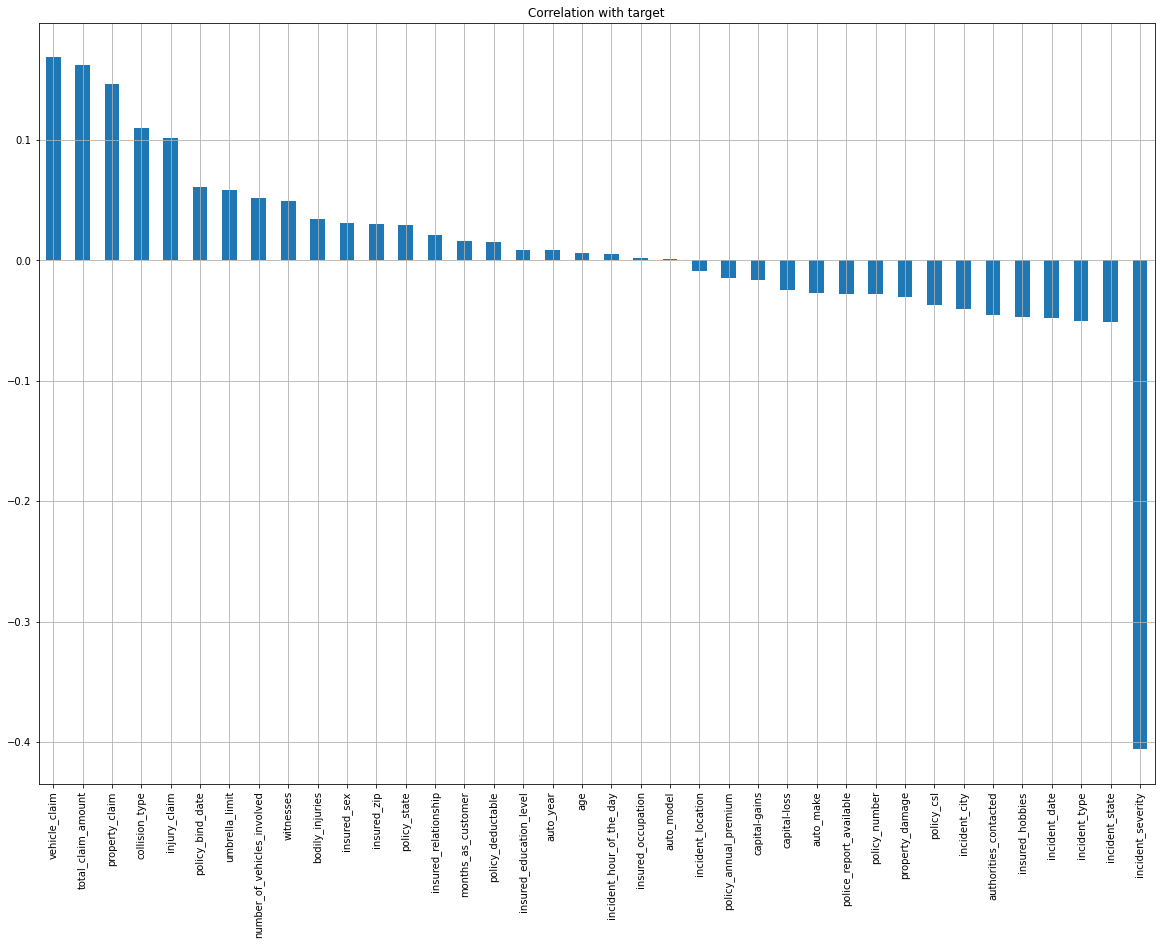

In [22]:
corr = data.drop('fraud_reported', axis = 1).corrwith(data.fraud_reported).sort_values(ascending=False)

corr.plot(kind = 'bar', grid = True, figsize = (20,14),
          title = "Correlation with target")
plt.show()

In [23]:
data = data.drop('auto_model',axis = 1)

## Model building to predict fraud claims

In [24]:
x = data.drop('fraud_reported', axis = 1)
y = data.fraud_reported

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [26]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [27]:
dt = DecisionTreeClassifier()
kn = KNeighborsClassifier()
bg = BaggingClassifier()
lr = LogisticRegression()
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()
svc = SVC()

In [28]:
for i in range(0,20):
    x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.25, random_state = i)
    gb.fit(x_train,y_train)
    y_train_pred = gb.predict(x_train)
    y_test_pred = gb.predict(x_test)
    print(f"At random state {i}, the training accuracy is : {accuracy_score(y_train,y_train_pred)}")
    print(f"At random state {i}, the testing accuracy is : {accuracy_score(y_test,y_test_pred)}\n")

At random state 0, the training accuracy is : 0.9866666666666667
At random state 0, the testing accuracy is : 0.812

At random state 1, the training accuracy is : 0.972
At random state 1, the testing accuracy is : 0.812

At random state 2, the training accuracy is : 0.9773333333333334
At random state 2, the testing accuracy is : 0.804

At random state 3, the training accuracy is : 0.9693333333333334
At random state 3, the testing accuracy is : 0.844

At random state 4, the training accuracy is : 0.9786666666666667
At random state 4, the testing accuracy is : 0.788

At random state 5, the training accuracy is : 0.9786666666666667
At random state 5, the testing accuracy is : 0.82

At random state 6, the training accuracy is : 0.9693333333333334
At random state 6, the testing accuracy is : 0.836

At random state 7, the training accuracy is : 0.9706666666666667
At random state 7, the testing accuracy is : 0.812

At random state 8, the training accuracy is : 0.9733333333333334
At random sta

In [29]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.25, random_state = 13)
gb.fit(x_train, y_train)

GradientBoostingClassifier()

In [30]:
y_test_pred = gb.predict(x_test)
print(f"The accuracy score is {accuracy_score(y_test,y_test_pred)*100:.2f} %")

The accuracy score is 87.60 %


## Cross Validation

In [31]:
test_acc = accuracy_score(y_test,y_test_pred)

for i in range (2,15):
    cv_score = cross_val_score(gb,x_scaled,y,cv = i)
    cv_mean  = cv_score.mean()
    print(f"At cv = {i},cv_score = {cv_mean*100:.4f} and accuracy for testing = {test_acc*100:.4f}\n")

At cv = 2,cv_score = 81.8000 and accuracy for testing = 87.6000

At cv = 3,cv_score = 82.6012 and accuracy for testing = 87.6000

At cv = 4,cv_score = 82.5000 and accuracy for testing = 87.6000

At cv = 5,cv_score = 83.0000 and accuracy for testing = 87.6000

At cv = 6,cv_score = 82.1057 and accuracy for testing = 87.6000

At cv = 7,cv_score = 82.8031 and accuracy for testing = 87.6000

At cv = 8,cv_score = 82.5000 and accuracy for testing = 87.6000

At cv = 9,cv_score = 84.5006 and accuracy for testing = 87.6000

At cv = 10,cv_score = 82.2000 and accuracy for testing = 87.6000

At cv = 11,cv_score = 82.7017 and accuracy for testing = 87.6000

At cv = 12,cv_score = 82.5134 and accuracy for testing = 87.6000

At cv = 13,cv_score = 83.0012 and accuracy for testing = 87.6000

At cv = 14,cv_score = 83.0120 and accuracy for testing = 87.6000



In [32]:
cv_score = cross_val_score(gb,x_scaled,y,cv = 9)
cv_mean = cv_score.mean()
cv_mean

0.8419937794937796

## Hyperparameter tuning

### XGBoost

In [61]:
param_grid = {'criterion':['friedman_mse','squared_error'], 'n_estimators':[2,3,4,5],
               'learning_rate':[0.001,0.01,0.1,1.0], 'random_state':range(10,19),
               'max_depth':[5,10,15], 'max_leaf_nodes':[3,4,5]}
gridsearch = GridSearchCV(estimator = gb, param_grid = param_grid)
gridsearch.fit(x_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(max_depth=5, max_leaf_nodes=4,
                                                  n_estimators=2,
                                                  random_state=20),
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'learning_rate': [0.001, 0.01, 0.1, 1.0],
                         'max_depth': [5, 10, 15], 'max_leaf_nodes': [3, 4, 5],
                         'n_estimators': [2, 3, 4, 5],
                         'random_state': range(10, 19)})

In [62]:
gridsearch.best_params_

{'criterion': 'friedman_mse',
 'learning_rate': 1.0,
 'max_depth': 5,
 'max_leaf_nodes': 4,
 'n_estimators': 2,
 'random_state': 10}

In [63]:
gb = GradientBoostingClassifier(criterion = 'friedman_mse',learning_rate = 1,
                                max_depth = 5, max_leaf_nodes = 4, n_estimators = 2, random_state = 10)

In [64]:
gb.fit(x_train, y_train)

GradientBoostingClassifier(learning_rate=1, max_depth=5, max_leaf_nodes=4,
                           n_estimators=2, random_state=10)

In [65]:
y_pred = gb.predict(x_test)
y_pred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1.,
       1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1.,
       0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1.,
       0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0.,
       1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0.,
       0., 1., 0., 1., 0.

In [66]:
cfm = confusion_matrix(y_test, y_pred)
cfm

array([[169,  23],
       [  7,  51]], dtype=int64)

In [67]:
print(classification_report(y_test, y_pred, digits = 2))

              precision    recall  f1-score   support

         0.0       0.96      0.88      0.92       192
         1.0       0.69      0.88      0.77        58

    accuracy                           0.88       250
   macro avg       0.82      0.88      0.85       250
weighted avg       0.90      0.88      0.88       250



In [68]:
# ROC curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [69]:
print('Threshold =',thresholds)
print('True positive rate =',tpr)
print('False positive rate =',fpr)

Threshold = [2. 1. 0.]
True positive rate = [0.         0.87931034 1.        ]
False positive rate = [0.         0.11979167 1.        ]


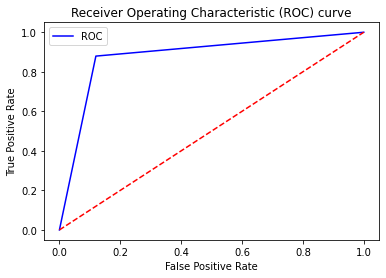

In [70]:
plt.plot(fpr, tpr, color = 'blue', label = 'ROC')
plt.plot([0,1], [0,1], color = 'red', linestyle = '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) curve')
plt.legend()
plt.show()

In [73]:
# Area Under the Curve (AUC)

auc_score = roc_auc_score(y_test, y_pred)
auc_score

0.8797593390804598

## Saving the file

In [74]:
import pickle
filename = 'Insurance_claim_fraud_detection.pkl'
pickle.dump(gb,open(filename,'wb'))